# OPEN FIELD SEGMENTATION
> Sexual Behavior and Plasticity Lab. INB, UNAM.


> *versión 1.1*

> The aim of this project is to segment rat images in Open Field and obtain their movement data and graphs. The segmentation is made using the You Only Look Once v8 (YOLOv8) algorithm and all the data, including graphs, labels and databases is automatically storaged in Google Drive.

## 1. Setup

Allow Colab to connect with Google Drive.
You will need to access to your gmail account and accept all the permission.



In [ ]:
#DO NOT CHANGE THIS PARAMETERS

#Allow Colab to connect with drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Segmentation

Create a new segmentation model using pre-trained weigths (open field images).

**Inputs**


*   videoname: The Google Drive path and name of the video to process.


**Outputs**


*   *YOUR_VIDEO_NAME*_labels.txt: A txt file with all the coordinates of the rat edges. 




In [ ]:
#Name of the video to analyze
videoname="/content/gdrive/MyDrive/OpenField/s10d3r6_speedUp.mp4"

In [ ]:
#DO NOT CHANGE THIS PARAMETERS

#Download the python dependencies
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO # Create the YOLO model 
model = YOLO("/content/gdrive/MyDrive/Ratainador/best_data_aum.pt")  # load the custom pretrained YOLOv8n segmentation model 
#Prediciton: Segmentation of the new video
predict=model.predict(videoname,save=False,save_txt=True)#save=True: video & boxes 

#Save all the labels in a single txt in Drive
!ls /content/gdrive/MyDrive/Colab\ Notebooks/*.py 
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/'
)
import OpenFieldMethods as OFM
OFM.createLabel(videoname)#save_txt=txt with coordinates

Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/5490) /content/gdrive/MyDrive/OpenField/s10d3r6_speedUp.mp4: 384x640 (no detections), 15.0ms
video 1/1 (2/5490) /content/gdrive/MyDrive/OpenField/s10d3r6_speedUp.mp4: 384x640 (no detections), 16.3ms
video 1/1 (3/5490) /content/gdrive/MyDrive/OpenField/s10d3r6_speedUp.mp4: 384x640 (no detec

In [ ]:
#Save all the labels in a single txt in Drive
!ls /content/gdrive/MyDrive/Colab\ Notebooks/*.py 
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/'
)
import OpenFieldMethods as OFM
OFM.createLabel(videoname)#txt with coordinates

## 3. Distance and movement
Calculate the distance that the rat has walked and show the motor results in graphs. Obtain the movement graphs and all the behavior data in a csv file.

**Inputs**


*   videoname: The Google Drive path and name of the video to process.
*   box_width: The box width in meters.

**Outputs**


*   OpenFieldSeg.csv: Database with distance and movement.
*   Accumulated distance graph: Distance (meters) x total video frames.
*   Tracking graph: Tracking lines of the rat movement.
*   Heat map graph: Heat map of the video. 





In [ ]:
#Post-processing 
videoname="/content/gdrive/MyDrive/OpenField/s10d3r6_speedUp.mp4"
box_width=1 

Select the box area using this order:
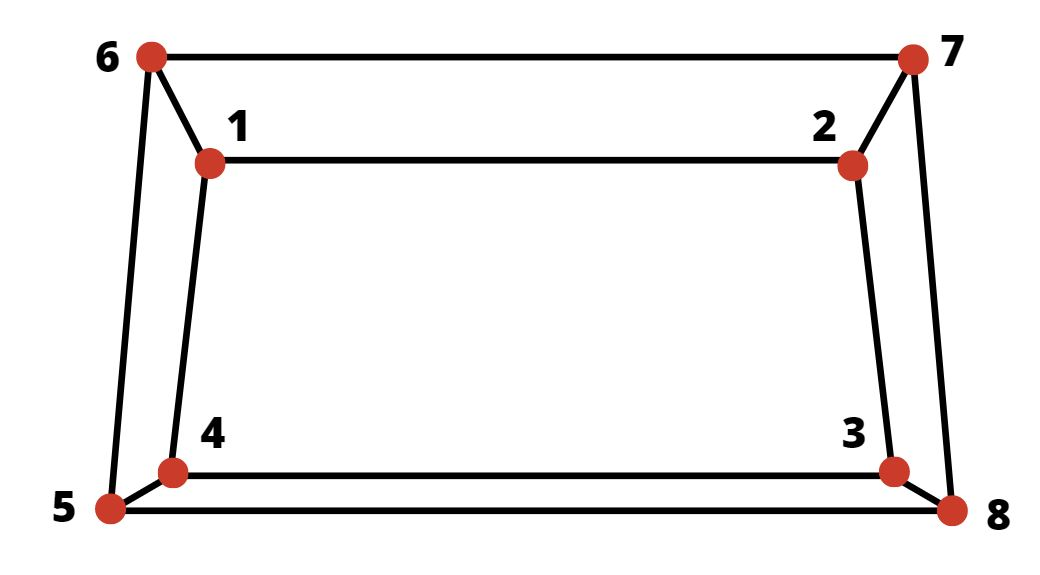

'/content/gdrive/MyDrive/Colab Notebooks/OpenFieldMethods.py'


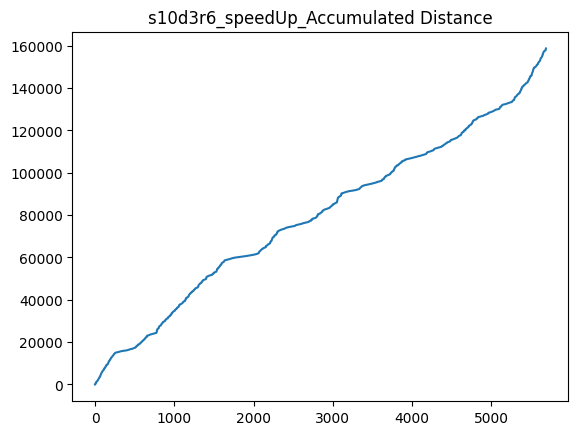

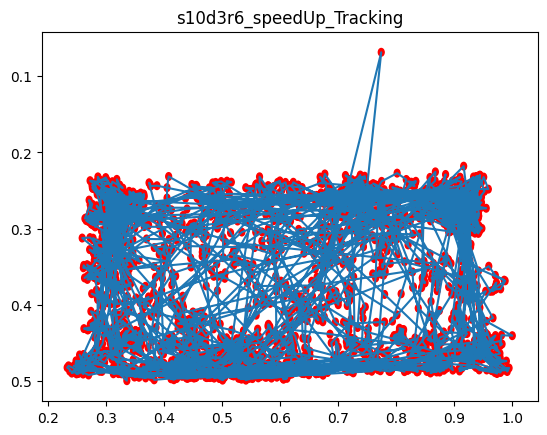

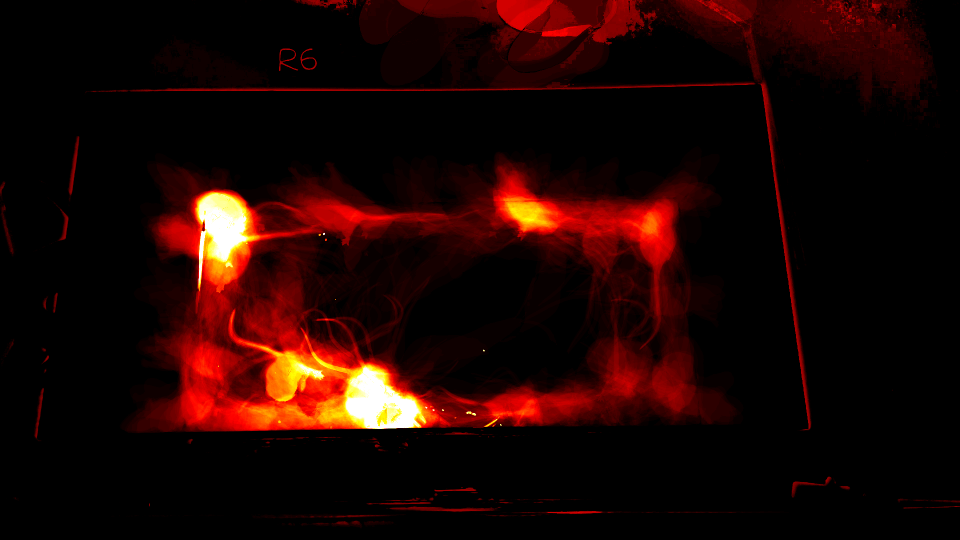

In [ ]:
#DO NOT CHANGE THIS PARAMETERS

#Install dependencies
!ls /content/gdrive/MyDrive/Colab\ Notebooks/*.py 
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/')

#Run the post-processing
import OpenFieldMethods as OFM
%matplotlib inline
OFM.postProcessing(videoname,box_width)